In [4]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np

In [4]:
data = pd.read_csv("./datasets/spotify_music.csv")
data.head()

,Id,Rank,Track,Artist,Streams,Week,Album_name,Explicit,Track_number_on_album,Artist_followers,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Mode,Key,Valence
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,1,Starboy,The Weeknd,25734078,2017-01-06,Starboy,1,1,31348348,...,0.681,0.594,0.000003,0.134,-7.028,0.2820,186.054,1,7,0.5350
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2,Closer,The Chainsmokers,23519705,2017-01-06,Closer,0,1,17742887,...,0.748,0.524,0.000000,0.111,-5.599,0.0338,95.010,1,8,0.6610
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),0,1,4296325,...,0.720,0.763,0.000000,0.180,-4.068,0.0523,101.965,0,9,0.7420
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,4,Let Me Love You,DJ Snake,19852704,2017-01-06,Encore,0,13,7312319,...,0.476,0.718,0.000010,0.122,-5.309,0.0576,199.864,1,8,0.1420
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,2,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,30752312,2017-02-17,I Don’t Wanna Live Forever (Fifty Shades Darker),0,1,15423979,...,0.735,0.451,0.000013,0.325,-8.374,0.0585,117.973,1,0,0.0862


In [6]:
def convert_y(dataY):
    y = []
    for i in range (len(dataY)):
        if(dataY[i] > 50):
            y.append(0)
        else:
            y.append(1)
    return np.array(y)
data['Hit'] = convert_y(data.Rank)

In [7]:
data.head()

,Id,Rank,Track,Artist,Streams,Week,Album_name,Explicit,Track_number_on_album,Artist_followers,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Mode,Key,Valence,Hit
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,1,Starboy,The Weeknd,25734078,2017-01-06,Starboy,1,1,31348348,...,0.594,0.000003,0.134,-7.028,0.2820,186.054,1,7,0.5350,1
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2,Closer,The Chainsmokers,23519705,2017-01-06,Closer,0,1,17742887,...,0.524,0.000000,0.111,-5.599,0.0338,95.010,1,8,0.6610,1
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),0,1,4296325,...,0.763,0.000000,0.180,-4.068,0.0523,101.965,0,9,0.7420,1
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,4,Let Me Love You,DJ Snake,19852704,2017-01-06,Encore,0,13,7312319,...,0.718,0.000010,0.122,-5.309,0.0576,199.864,1,8,0.1420,1
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,2,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,30752312,2017-02-17,I Don’t Wanna Live Forever (Fifty Shades Darker),0,1,15423979,...,0.451,0.000013,0.325,-8.374,0.0585,117.973,1,0,0.0862,1


In [1]:
import pandas as pd
df = pd.read_csv('./datasets/lyrics_processed.csv')
df.lyrics_processed = df.lyrics_processed.astype(str)
df.head()

,Id,Title,Lyrics,lyrics_processed,neg,neu,pos,compound,polarity,subjectivity
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,Starboy The Weeknd,[Verse 1]\r\nI'm tryna put you in the worst mo...,i'm tryna put you in the worst mood ah p1 clea...,0.152,0.777,0.071,-0.9883,0.131546,0.505317
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Closer The Chainsmokers,"[Verse 1: Andrew Taggart]\r\nHey, I was doing ...",hey i was doing just fine before i met you i d...,0.058,0.831,0.111,0.9597,0.185065,0.411328
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,Rockabye (feat. Sean Paul & Anne-Marie) Clean ...,[Intro: Sean Paul]\r\nCall it love and devotio...,call it love and devotion call it a mom's ador...,0.058,0.712,0.229,0.9988,0.262665,0.559491
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Let Me Love You DJ Snake,[Verse 1: Justin Bieber]\r\nI used to believe\...,i used to believe we were burnin' on the edge ...,0.213,0.575,0.212,0.9854,0.355556,0.571981
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,I Don’t Wanna Live Forever (Fifty Shades Darke...,[Verse 1: ZAYN]\r\nBeen sitting eyes wide open...,been sitting eyes wide open behind these four ...,0.120,0.829,0.051,-0.9750,-0.060331,0.375758


In [9]:
data = data.merge(df, how="right", on="Id")
data.to_csv('merged_data.csv', index=False)
data.head()

,Id,Rank,Track,Artist,Streams,Week,Album_name,Explicit,Track_number_on_album,Artist_followers,...,Hit,Title,Lyrics,lyrics_processed,neg,neu,pos,compound,polarity,subjectivity
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,1,Starboy,The Weeknd,25734078,2017-01-06,Starboy,1,1,31348348,...,1,Starboy The Weeknd,[Verse 1]\r\nI'm tryna put you in the worst mo...,i'm tryna put you in the worst mood ah p1 clea...,0.152,0.777,0.071,-0.9883,0.131546,0.505317
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2,Closer,The Chainsmokers,23519705,2017-01-06,Closer,0,1,17742887,...,1,Closer The Chainsmokers,"[Verse 1: Andrew Taggart]\r\nHey, I was doing ...",hey i was doing just fine before i met you i d...,0.058,0.831,0.111,0.9597,0.185065,0.411328
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),0,1,4296325,...,1,Rockabye (feat. Sean Paul & Anne-Marie) Clean ...,[Intro: Sean Paul]\r\nCall it love and devotio...,call it love and devotion call it a mom's ador...,0.058,0.712,0.229,0.9988,0.262665,0.559491
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,4,Let Me Love You,DJ Snake,19852704,2017-01-06,Encore,0,13,7312319,...,1,Let Me Love You DJ Snake,[Verse 1: Justin Bieber]\r\nI used to believe\...,i used to believe we were burnin' on the edge ...,0.213,0.575,0.212,0.9854,0.355556,0.571981
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,2,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,30752312,2017-02-17,I Don’t Wanna Live Forever (Fifty Shades Darker),0,1,15423979,...,1,I Don’t Wanna Live Forever (Fifty Shades Darke...,[Verse 1: ZAYN]\r\nBeen sitting eyes wide open...,been sitting eyes wide open behind these four ...,0.120,0.829,0.051,-0.9750,-0.060331,0.375758


In [15]:
example = 'The movie was awesome.'
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(example)

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [17]:
df[['neg', 'neu', 'pos', 'compound']] = df['lyrics_processed'].apply(sid.polarity_scores).apply(pd.Series)
df.head()
# df[['neg', 'neu', 'pos', 'compound']] = df['lyrics_processed'].apply(sid.polarity_scores)

,Id,Title,Lyrics,lyrics_processed,neg,neu,pos,compound
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,Starboy The Weeknd,[Verse 1]\r\nI'm tryna put you in the worst mo...,i'm tryna put you in the worst mood ah p1 clea...,0.152,0.777,0.071,-0.9883
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Closer The Chainsmokers,"[Verse 1: Andrew Taggart]\r\nHey, I was doing ...",hey i was doing just fine before i met you i d...,0.058,0.831,0.111,0.9597
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,Rockabye (feat. Sean Paul & Anne-Marie) Clean ...,[Intro: Sean Paul]\r\nCall it love and devotio...,call it love and devotion call it a mom's ador...,0.058,0.712,0.229,0.9988
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Let Me Love You DJ Snake,[Verse 1: Justin Bieber]\r\nI used to believe\...,i used to believe we were burnin' on the edge ...,0.213,0.575,0.212,0.9854
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,I Don’t Wanna Live Forever (Fifty Shades Darke...,[Verse 1: ZAYN]\r\nBeen sitting eyes wide open...,been sitting eyes wide open behind these four ...,0.120,0.829,0.051,-0.9750


In [23]:
df[['polarity', 'subjectivity']] = df['lyrics_processed'].apply(lambda x:TextBlob(x).sentiment).to_list()

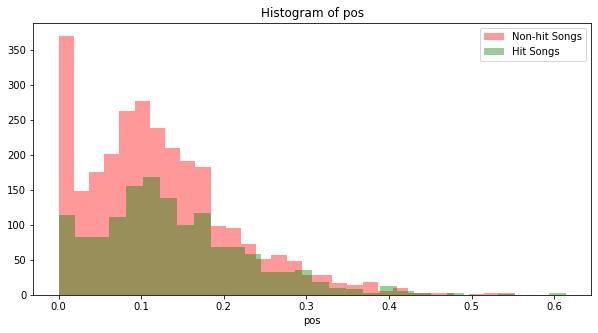

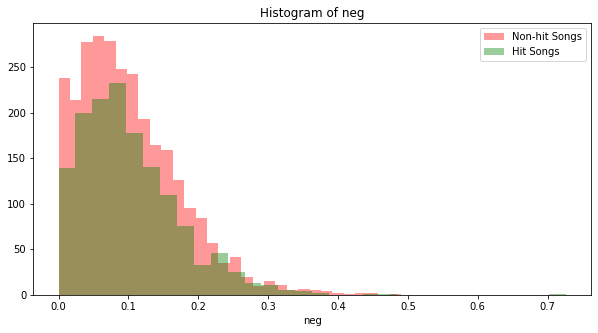

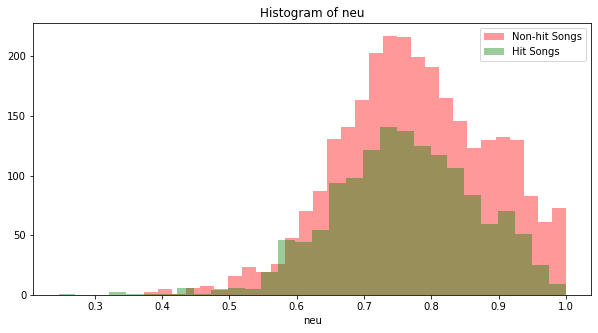

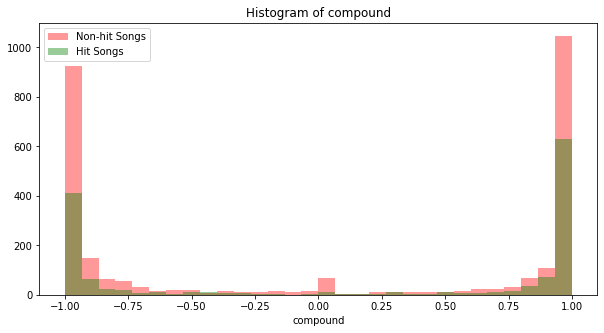

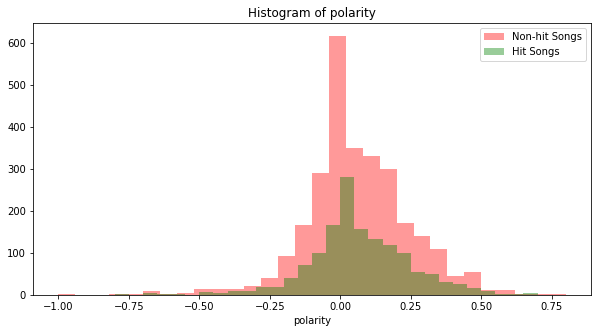

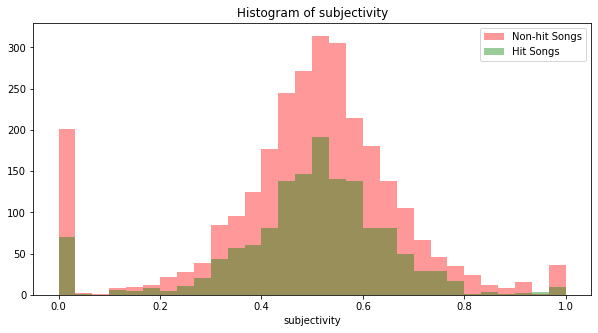

In [15]:
for var in ['pos', 'neg', 'neu', 'compound', 'polarity', 'subjectivity']:
    plt.figure(figsize=(10,5))
    sns.distplot(data[data['Hit']==0][var], bins=30, kde=False, 
                 color='red', label = "Non-hit Songs")
    sns.distplot(data[data['Hit']==1][var], bins=30, kde=False, 
                 color='green', label = "Hit Songs")
    plt.title(f'Histogram of {var}')
    plt.legend()
    plt.savefig(f"./plots/final/hist_{var}_hit_distinction.png")

In [24]:
df.head()

,Id,Title,Lyrics,lyrics_processed,neg,neu,pos,compound,polarity,subjectivity
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,Starboy The Weeknd,[Verse 1]\r\nI'm tryna put you in the worst mo...,i'm tryna put you in the worst mood ah p1 clea...,0.152,0.777,0.071,-0.9883,0.131546,0.505317
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Closer The Chainsmokers,"[Verse 1: Andrew Taggart]\r\nHey, I was doing ...",hey i was doing just fine before i met you i d...,0.058,0.831,0.111,0.9597,0.185065,0.411328
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,Rockabye (feat. Sean Paul & Anne-Marie) Clean ...,[Intro: Sean Paul]\r\nCall it love and devotio...,call it love and devotion call it a mom's ador...,0.058,0.712,0.229,0.9988,0.262665,0.559491
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Let Me Love You DJ Snake,[Verse 1: Justin Bieber]\r\nI used to believe\...,i used to believe we were burnin' on the edge ...,0.213,0.575,0.212,0.9854,0.355556,0.571981
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,I Don’t Wanna Live Forever (Fifty Shades Darke...,[Verse 1: ZAYN]\r\nBeen sitting eyes wide open...,been sitting eyes wide open behind these four ...,0.120,0.829,0.051,-0.9750,-0.060331,0.375758


In [25]:
df.to_csv('./datasets/lyrics_processed.csv', index=False)

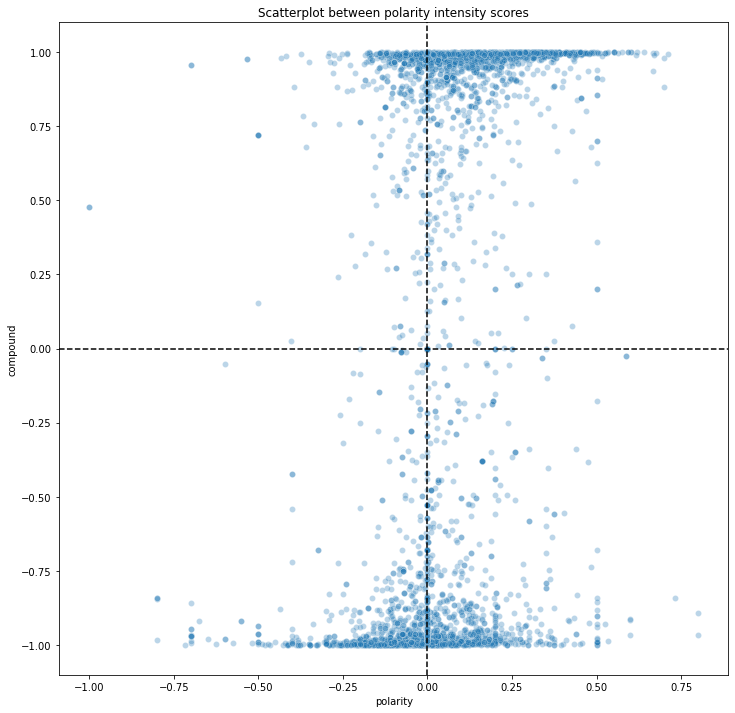

In [31]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df, x='polarity', y='compound',
                # hue='target', palette=['red', 'green'], 
                alpha=.3)
plt.axhline(0, linestyle='--', color='k')
plt.axvline(0, linestyle='--', color='k')
plt.title('Scatterplot between polarity intensity scores')
plt.savefig('./plots/final/scatterplot_intensity_scores.png')

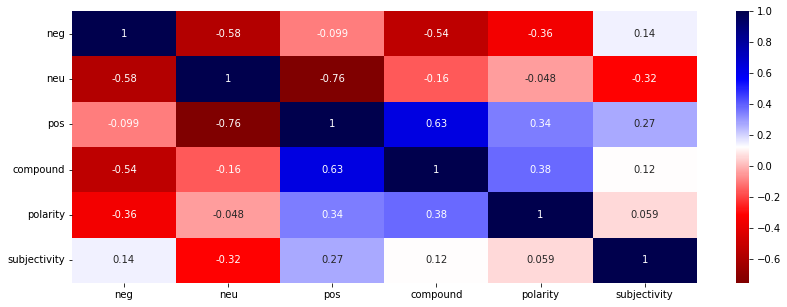

In [32]:
plt.figure(figsize = (14,5))
columns = ['neg', 'neu', 'pos', 'compound', 'polarity', 
           'subjectivity']
sns.heatmap(df[columns].corr(), annot=True, cmap='seismic_r');